In [1]:
%load_ext autoreload
%autoreload 2
from simulator import Simulator
from params import parameters
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import quantities as pq
import neo
%matplotlib inline
plt.rcParams.update({'figure.figsize': (16, 9)})

In [2]:
working_name = 'cond'
sim = Simulator(parameters, fname=working_name)

In [3]:
sim.set_kernel()
sim.set_neurons()
sim.set_connections()
sim.set_spike_rec()
sim.set_state_rec()
sim.simulate()

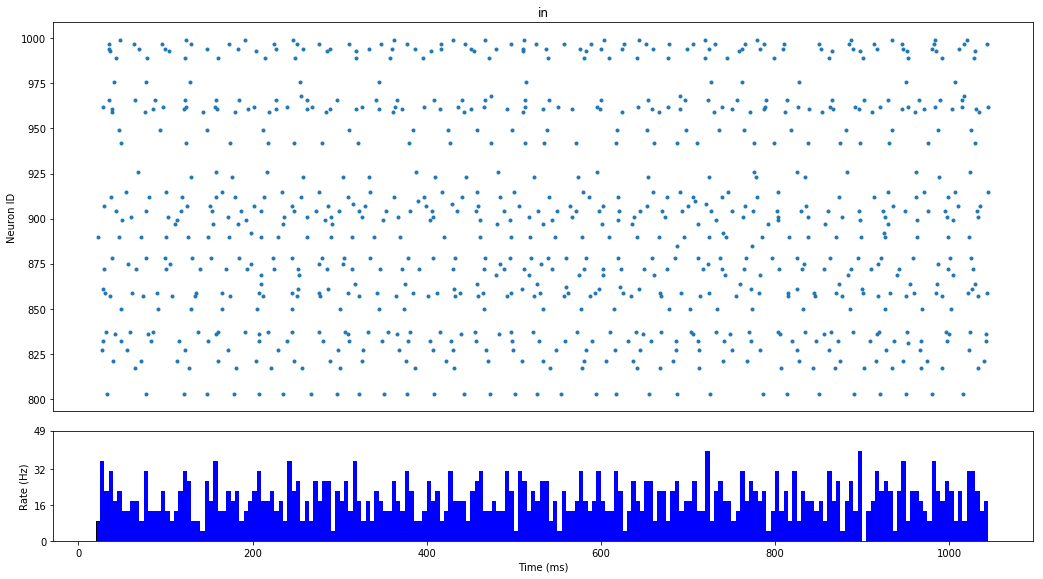

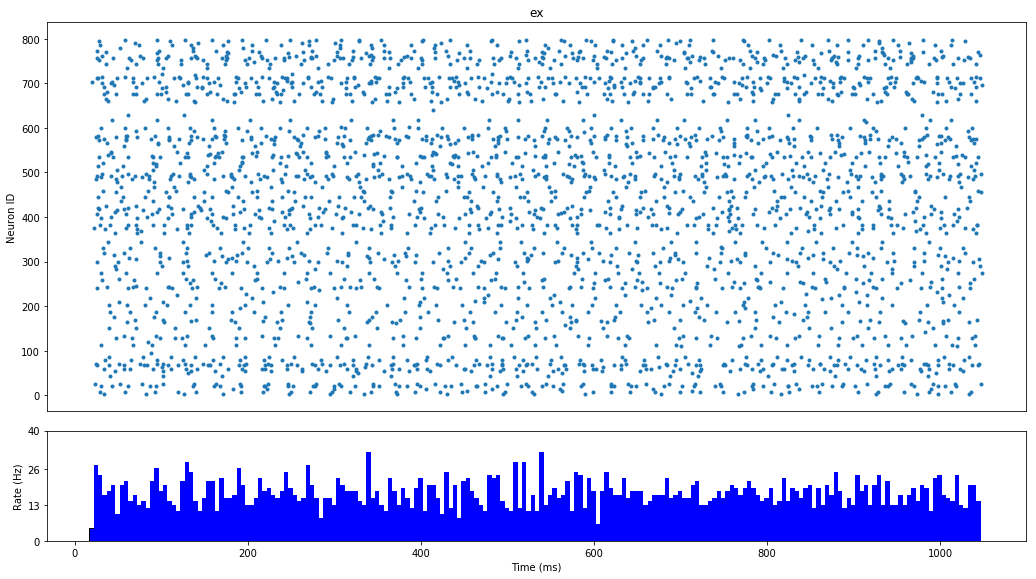

In [4]:
sim.save_raster()

In [5]:
connections = pd.DataFrame(sim.data['connections'])

In [6]:
connections

,delay,receptor,sizeof,source,synapse_model,target,weight
0,1.5,79,32,1,excitatory,2,0.1
1,1.5,78,32,1,excitatory,11,0.1
2,1.5,32,32,1,excitatory,24,0.1
3,1.5,54,32,1,excitatory,25,0.1
4,1.5,7,32,1,excitatory,29,0.1
5,1.5,18,32,1,excitatory,31,0.1
6,1.5,50,32,1,excitatory,36,0.1
7,1.5,92,32,1,excitatory,45,0.1
8,1.5,47,32,1,excitatory,46,0.1
9,1.5,21,32,1,excitatory,48,0.1


In [7]:
spikes_ex = pd.DataFrame(sim.data['spiketrains']['excitatory']).groupby('senders')
spikes_in = pd.DataFrame(sim.data['spiketrains']['inhibitory']).groupby('senders')

In [8]:
from elephant.conversion import BinnedSpikeTrain
t_stop = sim.data['params']['nest_kernel_status']['time']
spike_trains_ex = [neo.SpikeTrain(sp['times'], t_stop=t_stop, units='ms') for _, sp in spikes_ex]
ids_ex = [s for s, _ in spikes_ex]
spike_trains_in = [neo.SpikeTrain(sp['times'], t_stop=t_stop, units='ms') for _, sp in spikes_in]
ids_in = [s for s, _ in spikes_in]
spike_trains = spike_trains_ex + spike_trains_in
ids = ids_ex + ids_in

In [9]:
spikes_binned = BinnedSpikeTrain(spike_trains, binsize=5 * pq.ms, t_start=0 * pq.ms, t_stop=t_stop * pq.ms)

In [10]:
from elephant.spike_train_correlation import corrcoef
cc_matrix = corrcoef(spikes_binned)

In [11]:
ccs = []
for _, conn in connections.T.iteritems():
    try:
        i = ids.index(conn.source)
        j = ids.index(conn.target)
        ccs.append(cc_matrix[i,j])
    except ValueError: # TODO some targets are missing
        pass

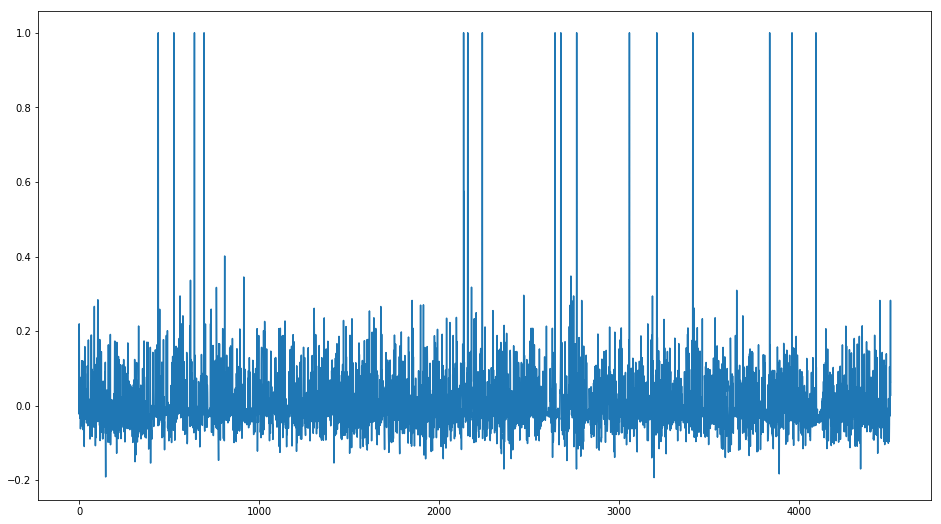

In [12]:
plt.plot(ccs)

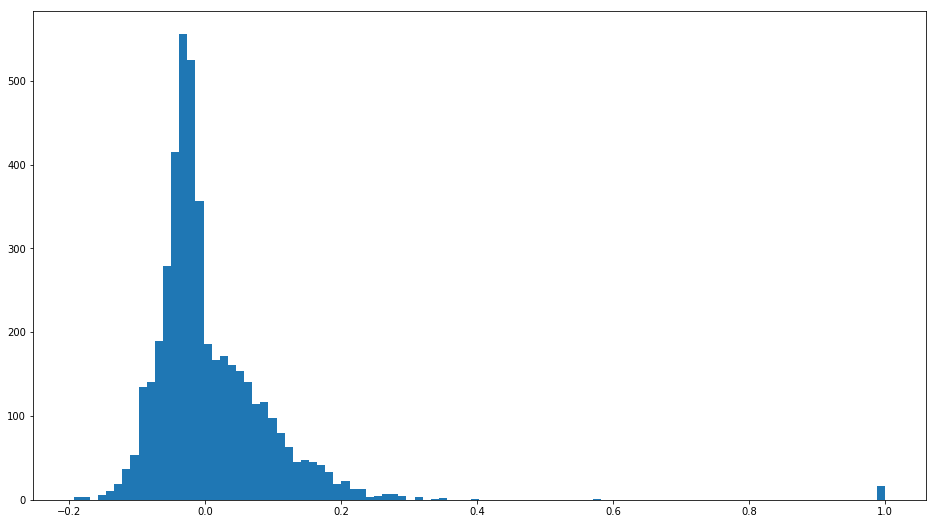

In [13]:
plt.hist(ccs, bins=100);